#Load library

In [6]:
import pandas as pd

#Load datasets

In [8]:
pizza = {'diameter' : [5,10,15,20,25],
         'harga' : [20,35,40,50,70]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,5,20
1,10,35
2,15,40
3,20,50
4,25,70


#memvisualisasikan data

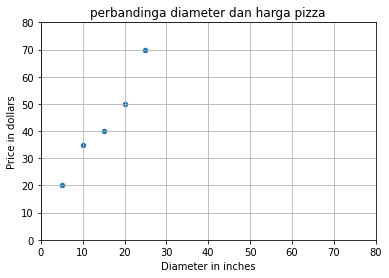

In [16]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('perbandinga diameter dan harga pizza')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.xlim(0,80)
plt.ylim(0,80)
plt.grid(True)
plt.show()

**Model Simple Linier Regressio**

#merubah dataset ke ray satu dimensi

In [17]:
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x : {x}')
print(f'y : {y}')

x : [ 5 10 15 20 25]
y : [20 35 40 50 70]


In [18]:
x = x.reshape(-1,1)
x.shape

(5, 1)

In [19]:
x

array([[ 5],
       [10],
       [15],
       [20],
       [25]])

**Training Simple Linier Regression Model**

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#visualisasi simple linear regression model

In [21]:
x_vis = np.array([0, 80]).reshape(-1,1)
y_vis = model.predict(x_vis)

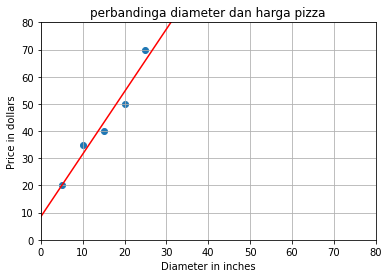

In [22]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title('perbandinga diameter dan harga pizza')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.xlim(0,80)
plt.ylim(0,80)
plt.grid()
plt.show()

In [23]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 8.499999999999986
slope: [2.3]


#**mencari nilai slope**

In [25]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y: {y}')

x:
[[ 5]
 [10]
 [15]
 [20]
 [25]]

x flatten: [ 5 10 15 20 25]

y: [20 35 40 50 70]


variance

In [26]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 62.5


covariance

In [28]:
np.cov(x.flatten(), y)

array([[ 62.5 , 143.75],
       [143.75, 345.  ]])

In [29]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 143.75


nilai slope

In [30]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 2.3


#**mencari nilai intercept**

In [32]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept: {intercept}')

intercept: 8.5


#**prediksi harga pizza berdasarkan ukuran diameter**

In [34]:
diameter_pizza = np.array([15, 20, 25]).reshape(-1, 1)
diameter_pizza

array([[15],
       [20],
       [25]])

In [36]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([43. , 54.5, 66. ])

In [37]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
  print(f'diameter : {dmtr} prediksi harga: {hrg}')

diameter : [15] prediksi harga: 43.0
diameter : [20] prediksi harga: 54.5
diameter : [25] prediksi harga: 66.0


#**evaluasi simple linier regression model training & testing dataset**

In [38]:
x_train = np.array([5, 10, 15, 20, 25]).reshape(-1, 1)
y_train = np.array([3, 6, 9, 12, 15])

x_test = np.array([2, 4, 6, 8, 10]).reshape(-1,1)
y_test = np.array([10, 20, 30, 40, 50])

training simple linear regression model

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

evaluasi linear regression model dengan coefficient of determination atau r-squared

In [40]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: -3.2592000000000008
